<a href="https://colab.research.google.com/github/ingridlagares/nlp_class/blob/main/TP1_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependências

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
pip install -U spacy

In [ ]:
pip install -U spacy-lookups-data

In [ ]:
pip install -U gensim

In [ ]:
!python -m spacy download en_core_web_md #pre-trained model

# **Corpus**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
corpus = open('/content/drive/MyDrive/NLP/text8').read()

In [ ]:
import spacy
nlp = spacy.load('en_core_web_md')
nlp.max_length = len(corpus)+1024
nlp.add_pipe('sentencizer') 

In [ ]:
doc = nlp(corpus[0:200000])

# **Preprocessing**

In [ ]:
def clean(doc):
  clean_doc = list(
      filter(
          lambda x: x.is_alpha and len(x) > 2 and not x.is_stop, 
          doc
      )
  )

  return clean_doc

In [ ]:
clean_sentences = [list(map(lambda x: x.text, clean(sent))) for sent in doc.sents]

print(clean_sentences)

# **Word2Vec**

In [ ]:
from gensim.models import Word2Vec

def gen_trained_w2v(sentences, min_count=1, window=6, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, sg=1, epochs=30):
  w2v = Word2Vec(
    min_count=min_count,
    window=window,
    sample=sample,
    alpha=alpha, 
    min_alpha=min_alpha, 
    negative=negative,
    sg=sg
  )

  w2v.build_vocab(sentences)
  w2v.train(sentences, total_examples=w2v.corpus_count, epochs=epochs)

  return w2v

# **Evaluation**

In [ ]:
vocab = open('/content/drive/MyDrive/NLP/questions-words.txt', 'r').readlines()

In [ ]:
from collections import defaultdict as dd

def compare(trained_w2v, vocab):
  result = dict()
  tokenized_vocab = [line.rstrip().lower().split() for line in vocab if line.find(':') == -1]

  for words in tokenized_vocab:
    try:
      similarities = trained_w2v.wv.most_similar(positive=[words[0], words[1], words[2]], topn=10)

      topo = similarities[0]
      similarity = trained_w2v.wv.similarity(topo[0], words[3])

      diff = float(topo[1]) - similarity
      result[words[3] + '<->' + str(topo[0])] = diff
    except:
      pass

  return result

## CBOW

Training with CBOW, window size = 1 and 81 training sentences
Error Average: 0.00046140
Training with CBOW, window size = 2 and 81 training sentences
Error Average: 0.00038582
Training with CBOW, window size = 3 and 81 training sentences
Error Average: 0.00033357
Training with CBOW, window size = 4 and 81 training sentences
Error Average: 0.00030228
Training with CBOW, window size = 5 and 81 training sentences
Error Average: 0.00031851
Training with CBOW, window size = 6 and 81 training sentences
Error Average: 0.00028879
Training with CBOW, window size = 7 and 81 training sentences
Error Average: 0.00029313
Training with CBOW, window size = 8 and 81 training sentences
Error Average: 0.00026803
Training with CBOW, window size = 9 and 81 training sentences
Error Average: 0.00029585
Training with CBOW, window size = 10 and 81 training sentences
Error Average: 0.00025900
Training with CBOW, window size = 11 and 81 training sentences
Error Average: 0.00029230
Training with CBOW, window siz

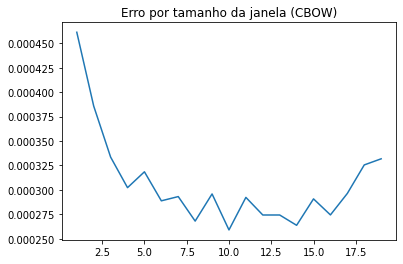

In [ ]:
# CBOW variando tamanho da janela
sg = 0
window_range = range(1, 20)
y_axis = []

n_sentences = len(clean_sentences)
for window in window_range:
    print("Training with %s, window size = %d and %d training sentences" % ("SkipGram" if sg else "CBOW", window, n_sentences))
    trained_w2v = gen_trained_w2v(clean_sentences[:n_sentences], window=window, sg=sg)
    errors = compare(trained_w2v, vocab)
    error_avg = sum(errors.values())/len(errors)
    y_axis.append(error_avg)

    print("Error Average: %.8f" % error_avg)

plt.plot(window_range, y_axis)
plt.title("Erro por tamanho da janela (CBOW)")
plt.show()


Training with CBOW, window size = 4 and 10 training sentences
Error Average: 0.00943977
Training with CBOW, window size = 4 and 11 training sentences
Error Average: 0.00033608
Training with CBOW, window size = 4 and 12 training sentences
Error Average: 0.00027960
Training with CBOW, window size = 4 and 13 training sentences
Error Average: 0.00016600
Training with CBOW, window size = 4 and 14 training sentences
Error Average: 0.00023782
Training with CBOW, window size = 4 and 15 training sentences
Error Average: 0.00028722
Training with CBOW, window size = 4 and 16 training sentences
Error Average: 0.00025585
Training with CBOW, window size = 4 and 17 training sentences
Error Average: 0.00028067
Training with CBOW, window size = 4 and 18 training sentences
Error Average: 0.00024097
Training with CBOW, window size = 4 and 19 training sentences
Error Average: 0.00025945
Training with CBOW, window size = 4 and 20 training sentences
Error Average: 0.00025720
Training with CBOW, window size 

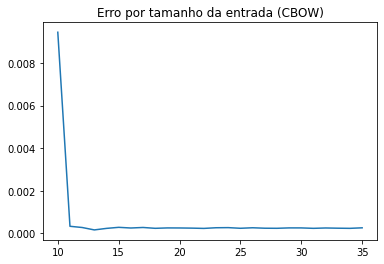

In [ ]:
# CBOW variando tamanho da entrada
sg = 0
window = 4
input_range = range(10, 36)
y_axis = []

for n_sentences in input_range:
    print("Training with %s, window size = %d and %d training sentences" % ("SkipGram" if sg else "CBOW", window, n_sentences))
    trained_w2v = gen_trained_w2v(clean_sentences[:n_sentences], window=window, sg=sg)
    errors = compare(trained_w2v, vocab)
    error_avg = sum(errors.values())/len(errors)
    y_axis.append(error_avg)

    print("Error Average: %.8f" % error_avg)

plt.plot(input_range, y_axis)
plt.title("Erro por tamanho da entrada (CBOW)")
plt.show()


## SkipGram

Training with SkipGram, window size = 1 and 81 training sentences
Error Average: 0.00077489
Training with SkipGram, window size = 2 and 81 training sentences
Error Average: 0.00100258
Training with SkipGram, window size = 3 and 81 training sentences
Error Average: 0.00153596
Training with SkipGram, window size = 4 and 81 training sentences
Error Average: 0.00306610
Training with SkipGram, window size = 5 and 81 training sentences
Error Average: 0.00762441
Training with SkipGram, window size = 6 and 81 training sentences
Error Average: 0.02507599
Training with SkipGram, window size = 7 and 81 training sentences
Error Average: 0.06265539
Training with SkipGram, window size = 8 and 81 training sentences
Error Average: 0.11787343
Training with SkipGram, window size = 9 and 81 training sentences
Error Average: 0.17539597


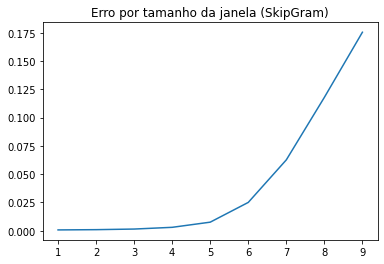

In [ ]:
# SkipGram variando tamanho da janela
sg = 1
window_range = range(1, 10)
y_axis = []

n_sentences = len(clean_sentences)
for window in window_range:
    print("Training with %s, window size = %d and %d training sentences" % ("SkipGram" if sg else "CBOW", window, n_sentences))
    trained_w2v = gen_trained_w2v(clean_sentences[:n_sentences], window=window, sg=sg)
    errors = compare(trained_w2v, vocab)
    error_avg = sum(errors.values())/len(errors)
    y_axis.append(error_avg)

    print("Error Average: %.8f" % error_avg)

plt.plot(window_range, y_axis)
plt.title("Erro por tamanho da janela (SkipGram)")
plt.show()


Training with SkipGram, window size = 4 and 10 training sentences
Error Average: 0.00053807
Training with SkipGram, window size = 4 and 11 training sentences
Error Average: 0.00048757
Training with SkipGram, window size = 4 and 12 training sentences
Error Average: 0.00057054
Training with SkipGram, window size = 4 and 13 training sentences
Error Average: 0.00060044
Training with SkipGram, window size = 4 and 14 training sentences
Error Average: 0.00061926
Training with SkipGram, window size = 4 and 15 training sentences
Error Average: 0.00066828
Training with SkipGram, window size = 4 and 16 training sentences
Error Average: 0.00072720
Training with SkipGram, window size = 4 and 17 training sentences
Error Average: 0.00075325
Training with SkipGram, window size = 4 and 18 training sentences
Error Average: 0.00080954
Training with SkipGram, window size = 4 and 19 training sentences
Error Average: 0.00087550
Training with SkipGram, window size = 4 and 20 training sentences
Error Average:

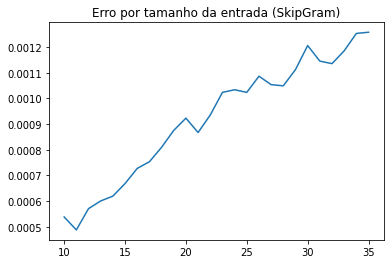

In [ ]:
# SkipGram variando tamanho da entrada
sg = 1
window = 4
input_range = range(10, 36)
y_axis = []

for n_sentences in input_range:
    print("Training with %s, window size = %d and %d training sentences" % ("SkipGram" if sg else "CBOW", window, n_sentences))
    trained_w2v = gen_trained_w2v(clean_sentences[:n_sentences], window=window, sg=sg)
    errors = compare(trained_w2v, vocab)
    error_avg = sum(errors.values())/len(errors)
    y_axis.append(error_avg)

    print("Error Average: %.8f" % error_avg)

plt.plot(input_range, y_axis)
plt.title("Erro por tamanho da entrada (SkipGram)")
plt.show()
